# First 2 bars vs day candlestick color - Analytics

### Import Library

In [11]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [12]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [13]:
tmp_data = dataset.copy()

In [14]:
tmp_data['ibs'] = tmp_data.apply(
    lambda r: 0 if (r['High'] == r['Low']) else abs(r['Close'] - r['Low']) / (r['High'] - r['Low']), axis=1)
def bar9h(tick):
    tick=tick[(tick.index.hour == 9) & (tick.index.minute == 0)]
    if len(tick):
        return tick[0]
def bar9h5(tick):
    tick=tick[(tick.index.hour == 9) & (tick.index.minute == 5)]
    if len(tick):
        return tick[0]
tmp_data['ibs_9h'] = tmp_data['ibs']
tmp_data['ibs_9h5'] = tmp_data['ibs']
day_data = tmp_data.resample('D').agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min',
        'ibs_9h': bar9h,
        'ibs_9h5': bar9h5
    })
day_data.dropna(subset=['Close'], inplace=True)

In [15]:
day_data['ibs'] = day_data.apply(
    lambda r: 0 if (r['High'] == r['Low']) else abs(r['Close'] - r['Low']) / (r['High'] - r['Low']), axis=1)

In [16]:
len(day_data)

1490

### Regplot

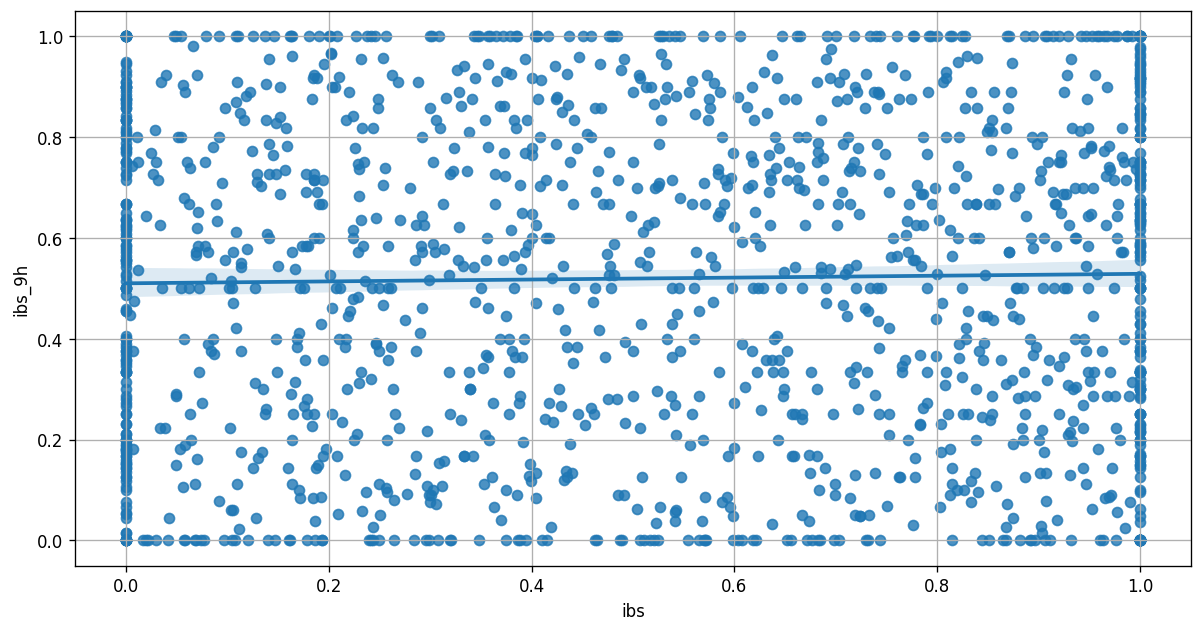

In [17]:
sns.regplot(x=day_data['ibs'], y=day_data['ibs_9h'])
plt.grid(True)

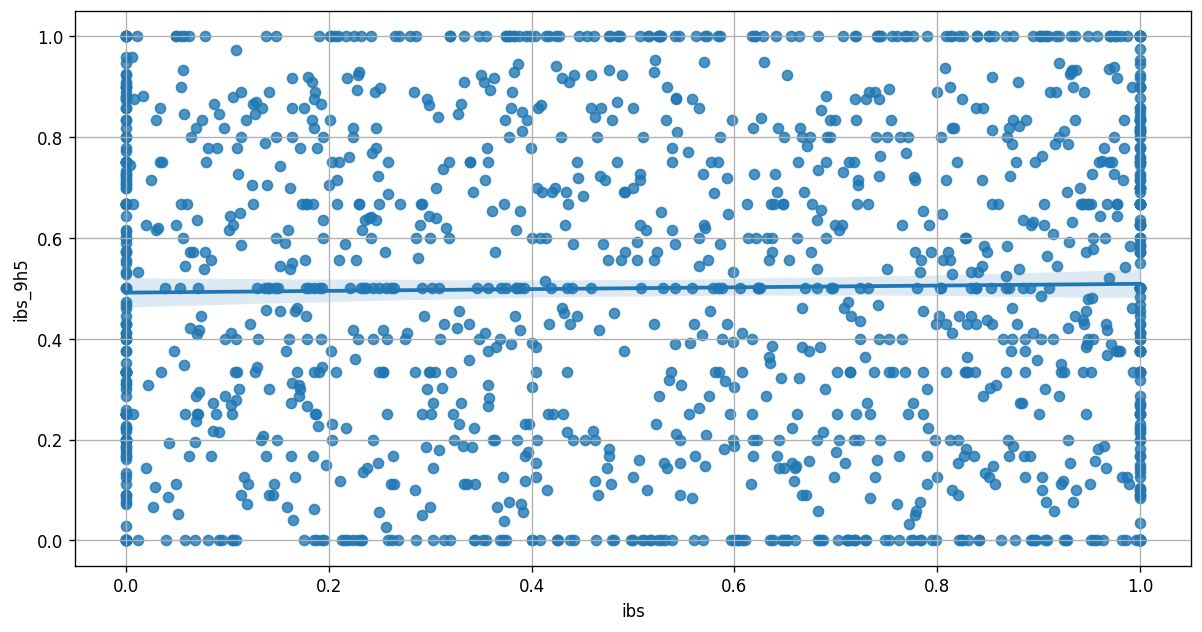

In [18]:
sns.regplot(x=day_data['ibs'], y=day_data['ibs_9h5'])
plt.grid(True)

### Heatmap

In [21]:
day_data.ibs_9h5

Date
2018-08-13    0.666667
2018-08-14    1.000000
2018-08-15    0.875000
2018-08-16    0.727273
2018-08-17    0.714286
                ...   
2024-07-29    0.750000
2024-07-30    0.250000
2024-07-31    1.000000
2024-08-01    0.888889
2024-08-02    0.812500
Name: ibs_9h5, Length: 1490, dtype: float64

In [23]:
day_data['ibs_9h_group'] = pd.qcut(day_data.ibs_9h, 10)

In [26]:
day_data['ibs_9h5_group'] = pd.qcut(day_data['ibs_9h5'], 9)

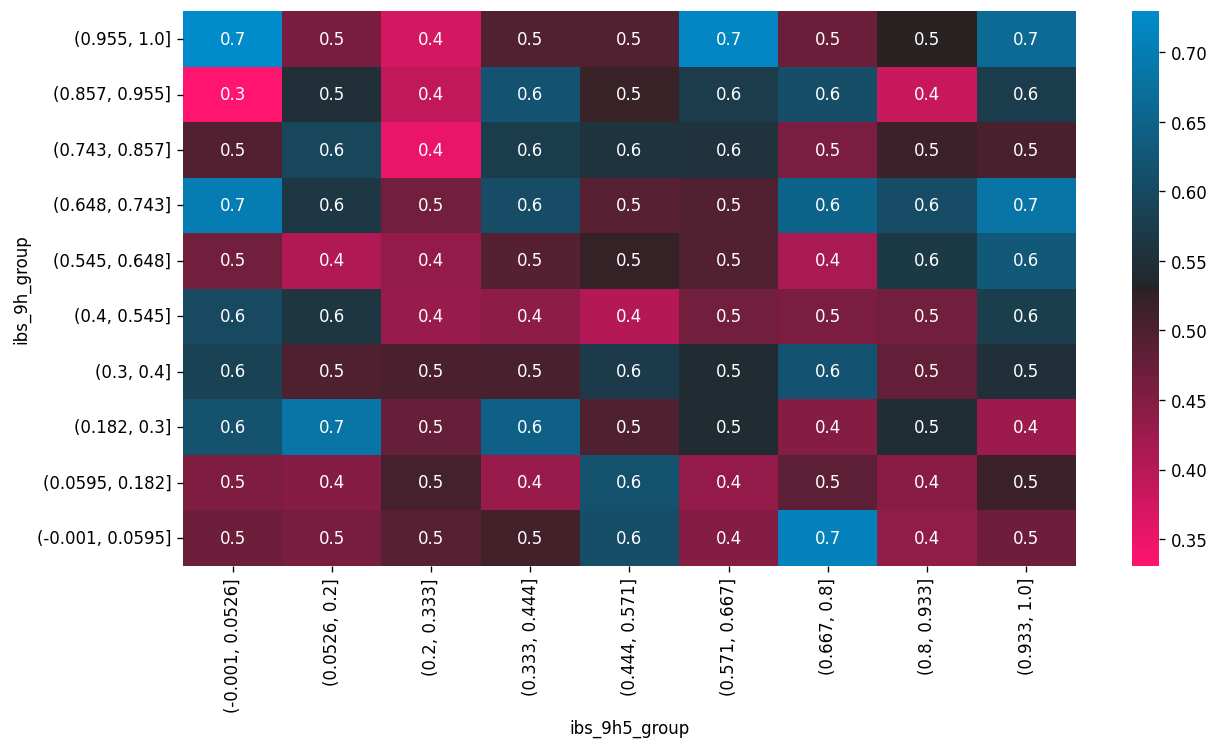

In [27]:
grpd = day_data.groupby(['ibs_9h_group', 'ibs_9h5_group'])[['ibs']]
irs = grpd.mean().reset_index()
sns.heatmap(
    irs.pivot(index='ibs_9h_group', columns='ibs_9h5_group', values='ibs').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");